# 1. Introdução


Neste projeto, o objetivo é desenvolver um modelo de machine learning capaz de prever a popularidade de uma música no Spotify, utilizando um conjunto de dados composto por mais de 100 mil faixas, contendo características acústicas, metadados e informações de popularidade fornecidas pela própria plataforma. O modelo será uma ferramenta valiosa para ajudar a gravadora a tomar decisões informadas sobre quais artistas promover e quais faixas têm maior potencial para se tornarem hits globais.

Ao longo deste projeto, serão explorados os dados, formuladas hipóteses, selecionadas as melhores features e construído um modelo preditivo. O desempenho do modelo será avaliado por meio de métricas como acurácia, precisão e recall, buscando atingir uma precisão mínima de 70%, conforme os critérios estabelecidos.]

# 2. Importando Bibliotecas


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


# Visualizando os Dados de Treino


In [ ]:
df_train = pd.read_csv('train.csv')
df_train.head()

,track_unique_id,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_target
0,41996,7hUhmkALyQ8SX9mJs5XI3D,Love and Rockets,Love and Rockets,Motorcycle,211533,False,0.305,0.8490,9,...,1,0.0549,0.000058,0.056700,0.4640,0.3200,141.793,4,goth,0
1,76471,5x59U89ZnjZXuNAAlc8X1u,Filippa Giordano,Filippa Giordano,"Addio del passato - From ""La traviata""",196000,False,0.287,0.1900,7,...,0,0.0370,0.930000,0.000356,0.0834,0.1330,83.685,4,opera,0
2,54809,70Vng5jLzoJLmeLu3ayBQq,Susumu Yokota,Symbol,Purple Rose Minuet,216506,False,0.583,0.5090,1,...,1,0.0362,0.777000,0.202000,0.1150,0.5440,90.459,3,idm,1
3,16326,1cRfzLJapgtwJ61xszs37b,Franz Liszt;YUNDI,Relajación y siestas,"Liebeslied (Widmung), S. 566",218346,False,0.163,0.0368,8,...,1,0.0472,0.991000,0.899000,0.1070,0.0387,69.442,3,classical,0
4,109799,47d5lYjbiMy0EdMRV8lRou,Scooter,Scooter Forever,The Darkside,173160,False,0.647,0.9210,2,...,1,0.1850,0.000939,0.371000,0.1310,0.1710,137.981,4,techno,0


# Visulaizando os Dados de Teste

In [ ]:

df_test = pd.read_csv('test.csv')
df_test.head()


(34200, 20)

In [ ]:
df_sample_submission = pd.read_csv('sample_submission.csv')
df_sample_submission.head()

,track_unique_id,popularity_target
0,113186,0
1,42819,0
2,59311,0
3,91368,1
4,61000,1


# Verificando Nulos


In [ ]:
df_train.isnull().sum()

,0
track_unique_id,0
track_id,0
artists,0
album_name,0
track_name,0
duration_ms,0
explicit,0
danceability,0
energy,0
key,0


# Feature engineering


                   track_unique_id  track_id   artists  album_name  \
track_unique_id           1.000000 -0.005102 -0.009493    0.004562   
track_id                 -0.005102  1.000000  0.003700    0.003518   
artists                  -0.009493  0.003700  1.000000    0.091393   
album_name                0.004562  0.003518  0.091393    1.000000   
track_name                0.001994  0.006039  0.039368    0.304900   
duration_ms              -0.030694 -0.003923 -0.028750    0.011637   
explicit                 -0.055368  0.002329 -0.004330   -0.000762   
danceability              0.004897 -0.000691 -0.011022   -0.020471   
energy                   -0.054469 -0.001331 -0.008359   -0.047616   
key                      -0.001805 -0.002963  0.007007   -0.008641   
loudness                 -0.020586  0.001024 -0.017680   -0.035497   
mode                      0.010368 -0.004488  0.000280   -0.000529   
speechiness              -0.066523 -0.005328 -0.016394   -0.016739   
acousticness        

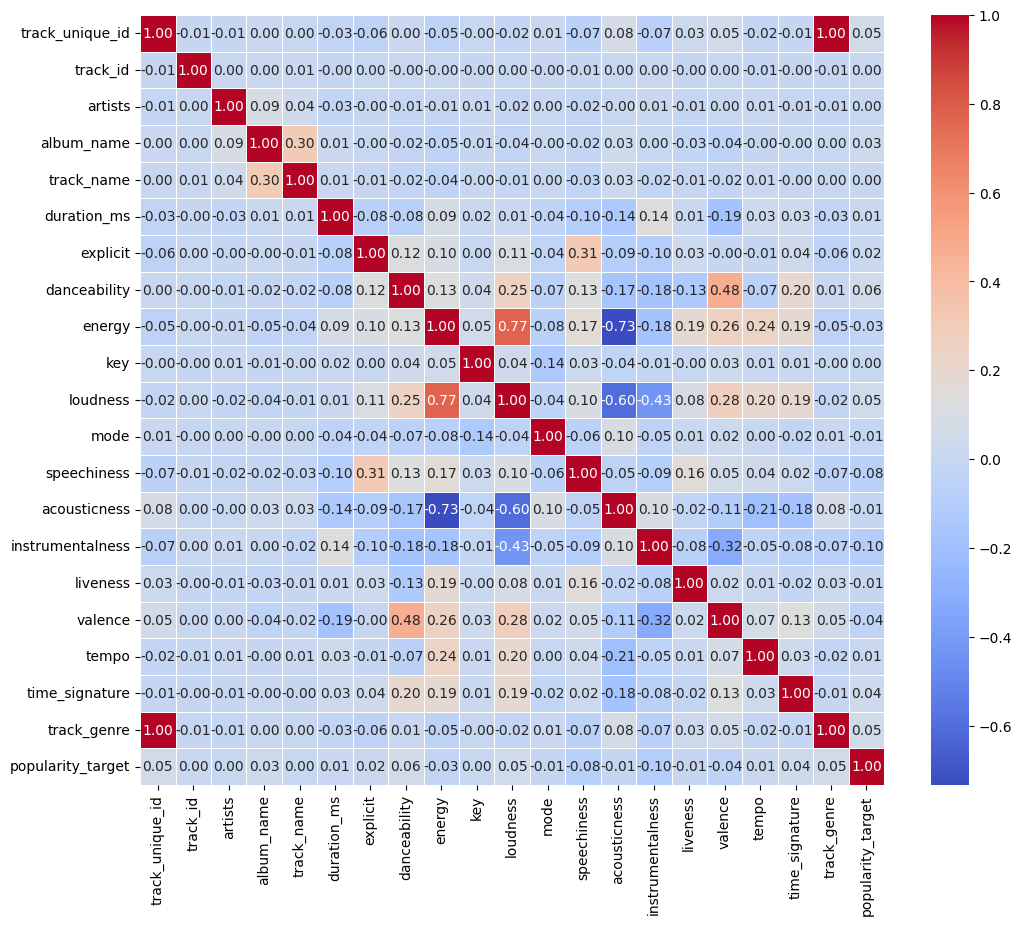

In [ ]:
# Definir o tamanho da figura
plt.figure(figsize=(12, 10))

# Plotar o heatmap da matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

print(correlation_matrix)
# Exibir o gráfico
plt.show()


# Gerando Hipóteses

 hipóteses sobre os dados e seu impacto na predição da popularidade de músicas (target **popularity_target**).

### Hipótese 1: **Aumentar a "danceability" de uma faixa pode aumentar sua popularidade.**
- **Justificativa**: A correlação positiva entre `danceability` e `popularity_target` (0.057) sugere que faixas com maior facilidade para dançar tendem a ser mais populares. Portanto, é possível que músicas mais dançantes, em geral, sejam preferidas pelo público, resultando em maior popularidade.
  
### Hipótese 2: **Faixas com alto valor de "instrumentalness" tendem a ser menos populares.**
- **Justificativa**: A variável `instrumentalness` tem uma correlação negativa com `popularity_target` (-0.101), indicando que faixas com um nível maior de componentes instrumentais (sem vocais) tendem a ser menos populares. Isso pode estar relacionado ao fato de que faixas com letras ou vocais podem atrair mais atenção e gerar maior conexão emocional com os ouvintes.
  
### Hipótese 3: **Músicas com maior "energy" podem ter uma popularidade reduzida.**
- **Justificativa**: A variável `energy` tem uma correlação negativa leve com `popularity_target` (-0.026). Embora `energy` seja uma característica desejável em algumas músicas, faixas com energia muito alta podem não ser tão populares entre o público mais amplo, possivelmente por serem muito intensas ou agitadas para certos gostos musicais.



#Tratamento de Outliers

 Mesmo com os outliers mapeados decidi rodar pois acredito que podem ser util para o modelo a um primeiro momento analisar

In [ ]:
import pandas as pd
import numpy as np

# Carregar o dataset (substitua com seu dataset)
df_train = pd.read_csv('train.csv')

# Função para calcular o Z-Score e identificar outliers
def identify_outliers_zscore(dataframe, threshold=3):
    # Calcula o Z-Score para todas as colunas numéricas
    z_scores = np.abs((dataframe - dataframe.mean()) / dataframe.std())

    # Define os outliers como valores cujo Z-Score é maior que o threshold (default = 3)
    outliers = z_scores > threshold

    return outliers

# Aplicar a função nas colunas numéricas do df_train
outliers = identify_outliers_zscore(df_train.select_dtypes(include=[np.number]))

# Filtrar as colunas que possuem ao menos um outlier
outlier_columns = outliers.any(axis=0)

# Filtrar as linhas que possuem ao menos um outlier
outlier_rows = outliers.any(axis=1)

# Exibir o dataframe contendo apenas as linhas e colunas com outliers
# Garantir que estamos filtrando o dataframe correto
outlier_df = df_train.loc[outlier_rows, outlier_columns.index]

print(outlier_df)


       track_unique_id  duration_ms  danceability   energy  key  loudness  \
17               29284       238285         0.643  0.98500    4    -1.848   
27               17051       110210         0.904  0.87100    8    -8.588   
64                9769       121853         0.794  0.75200    9    -7.935   
69               79673        70273         0.485  0.01920    4   -29.844   
79              101300       185943         0.141  0.04050    3   -29.013   
...                ...          ...           ...      ...  ...       ...   
79742            76552       599401         0.271  0.52500    4    -7.261   
79765            18431       158188         0.630  0.88200    2    -5.915   
79776           103355       181360         0.582  0.70500    3    -8.169   
79787            60263       196200         0.679  0.73600    1    -9.217   
79795            76820       162613         0.554  0.00763    4   -30.566   

       mode  speechiness  acousticness  instrumentalness  liveness  valence

In [ ]:
import pandas as pd
import numpy as np

# Definir os percentis para capping (1% e 99%)
lower_percentile = df_train.select_dtypes(include=[np.number]).quantile(0.01)
upper_percentile = df_train.select_dtypes(include=[np.number]).quantile(0.99)

# Função para aplicar capping em valores fora dos limites
def apply_capping(value, lower_bound, upper_bound):
    if value < lower_bound:
        return lower_bound
    elif value > upper_bound:
        return upper_bound
    return value

# Aplicar capping apenas nas linhas e colunas com outliers
for column in df_train.select_dtypes(include=[np.number]).columns:
    if outlier_columns[column]:  # Verificar se a coluna tem outliers
        # Aplicar capping apenas nas linhas com outliers detectados
        df_train.loc[outlier_rows, column] = df_train.loc[outlier_rows, column].apply(
            apply_capping, args=(lower_percentile[column], upper_percentile[column])
        )

# Verifique o dataframe após o capping
print(df_train)


       track_unique_id                track_id  \
0                41996  7hUhmkALyQ8SX9mJs5XI3D   
1                76471  5x59U89ZnjZXuNAAlc8X1u   
2                54809  70Vng5jLzoJLmeLu3ayBQq   
3                16326  1cRfzLJapgtwJ61xszs37b   
4               109799  47d5lYjbiMy0EdMRV8lRou   
...                ...                     ...   
79795            76820  6mmbWSbU5FElQOocyktyUZ   
79796           110268  0XL75lllKb1jTmEamqwVU6   
79797           103694  763FEhIZGILafwlkipdgtI   
79798              860  2VVWWwQ3FiWnmbukTb6Kd3   
79799            15795  3nic2HyQ0wsLb6IUFWiWu9   

                                                 artists  \
0                                       Love and Rockets   
1                                       Filippa Giordano   
2                                          Susumu Yokota   
3                                      Franz Liszt;YUNDI   
4                                                Scooter   
...                                    

<ipython-input-169-0c1efdd453b2>:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[238285. 110210. 121853. ... 181360. 196200. 162613.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_train.loc[outlier_rows, column] = df_train.loc[outlier_rows, column].apply(


#Label Enconding de ambos os CSV's

LABEL ENCODING DO TESTE

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in df_test.columns:
  if df_test[column].dtype == object:
    df_test[column] = le.fit_transform(df_test[column])

df_test.head()


,track_unique_id,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,113186,25507,5751,11698,15371,440247,False,0.369,0.598,7,-6.984,1,0.0304,0.00511,0.000000,0.176,0.0466,148.014,4,113
1,42819,10640,6116,7004,7331,93933,False,0.171,0.997,7,-3.586,1,0.1180,0.00521,0.801000,0.420,0.0294,122.223,4,42
2,59311,22435,14892,11747,19101,213578,False,0.173,0.803,9,-10.071,0,0.1440,0.61300,0.001910,0.195,0.0887,75.564,3,59
3,91368,28552,2086,1075,14049,151387,False,0.683,0.511,6,-5.598,1,0.0279,0.40600,0.000197,0.111,0.5980,109.991,3,90
4,61000,18449,9792,20017,27171,236293,False,0.555,0.941,9,-3.294,0,0.0481,0.48400,0.000000,0.266,0.8130,92.487,4,61


LABEL ENCODING DO TREINO

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Inicializar o LabelEncoder
le = LabelEncoder()

for column in df_train.columns:
  if df_train[column].dtype == object:
    df_train[column] = le.fit_transform(df_train[column])

df_train.head()

,track_unique_id,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_target
0,41996,64239,13481,18054,29483,211533.0,False,0.305,0.8490,9,...,1,0.0549,0.000058,0.056700,0.4640,0.3200,141.793,4,41,0
1,76471,50962,7754,10815,1549,196000.0,False,0.287,0.1900,7,...,0,0.0370,0.930000,0.000356,0.0834,0.1330,83.685,4,76,0
2,54809,60021,21526,28726,35849,216506.0,False,0.583,0.5090,1,...,1,0.0362,0.777000,0.202000,0.1150,0.5440,90.459,3,54,1
3,16326,13905,8029,24834,25598,218346.0,False,0.163,0.0368,8,...,1,0.0472,0.991000,0.899000,0.1070,0.0387,69.442,3,16,0
4,109799,35296,20008,26251,44199,173160.0,False,0.647,0.9210,2,...,1,0.1850,0.000939,0.371000,0.1310,0.1710,137.981,4,109,0


# Dividindo  treino e teste CSV de Treino




In [ ]:
from sklearn.model_selection import train_test_split

df_train["mode"] = df_train["mode"].astype(bool)
df_train["popularity_target"] = df_train["popularity_target"].astype(bool)


y = df_train["popularity_target"]
X = df_train.drop(["popularity_target", "track_unique_id", "track_id"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
23491,2782,32959,35615,297000.0,False,0.383,0.836,3,-4.788,True,0.0468,0.1010,0.00000,0.2290,0.260,146.052,4,113
72887,6717,28409,20906,287626.0,False,0.608,0.592,0,-9.642,False,0.0409,0.4690,0.90900,0.0651,0.365,77.937,4,45
54394,24440,19880,674,80699.0,False,0.537,0.110,2,-25.941,True,0.0605,0.9910,0.84800,0.1190,0.890,124.812,4,16
43696,3808,5596,52809,267120.0,False,0.582,0.813,0,-4.558,True,0.0295,0.0819,0.00119,0.9020,0.345,109.934,4,87
45363,18754,32499,47875,156983.0,False,0.677,0.256,7,-16.915,True,0.0448,0.9480,0.00001,0.0926,0.318,103.986,4,94


# Normalizando o CSV de Treino



In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled.head()


,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,-1.361216,1.377061,0.502755,0.869929,-0.306706,-1.070647,0.775265,-0.646679,0.710313,0.752720,-0.409113,-0.643081,-0.506791,0.084395,-0.824659,0.809112,0.22874,1.708929
1,-0.831667,0.954651,-0.423600,0.755415,-0.306706,0.234795,-0.195245,-1.488025,-0.293744,-1.328515,-0.478315,0.462676,2.419330,-0.782659,-0.419662,-1.491770,0.22874,-0.353354
2,1.553388,0.162841,-1.697787,-1.772446,-0.306706,-0.177144,-2.112400,-0.927128,-3.665219,0.752720,-0.248422,2.031169,2.222968,-0.497521,1.605324,0.091638,0.22874,-1.232858
3,-1.223143,-1.163248,1.585612,0.504910,-0.306706,0.083944,0.683783,-1.488025,0.757889,0.752720,-0.612028,-0.700473,-0.502960,3.644659,-0.496804,-0.410931,0.22874,0.920409
4,0.788200,1.334356,1.274875,-0.840545,-0.306706,0.635131,-1.531685,0.475115,-1.798176,0.752720,-0.432571,1.901964,-0.506759,-0.637181,-0.600946,-0.611851,0.22874,1.132703


# Aplicando Algoritimo RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Inicializa o modelo Random Forest
modelo_org = RandomForestClassifier(random_state=42)

# Treina o modelo com os dados de treino
modelo_org.fit(X_train_scaled, y_train)

# Faz previsões com os dados de teste
y_pred = modelo_org.predict(X_test_scaled)

# Avaliação do modelo
print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))


Acurácia: 0.8173
              precision    recall  f1-score   support

       False       0.83      0.81      0.82      8247
        True       0.80      0.82      0.81      7713

    accuracy                           0.82     15960
   macro avg       0.82      0.82      0.82     15960
weighted avg       0.82      0.82      0.82     15960



# Balaceando com SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Aplicar o balanceamento com SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verificar a distribuição das classes após o SMOTE
print(f"Distribuição das classes antes do SMOTE: {y_train.value_counts()}")
print(f"Distribuição das classes após o SMOTE: {y_train_balanced.value_counts()}")


Distribuição das classes antes do SMOTE: popularity_target
False    32623
True     31217
Name: count, dtype: int64
Distribuição das classes após o SMOTE: popularity_target
True     32623
False    32623
Name: count, dtype: int64


#Aplicando PCA


In [ ]:
# Normalização dos dados (apenas em X_train e X_test)
scaler = StandardScaler()
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Aplicar PCA para reduzir as dimensões
pca = PCA(n_components=0.95)  # Mantendo 95% da variância
X_train_pca = pca.fit_transform(X_train_balanced_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Verificar quantas componentes foram mantidas
print(f"Número de componentes PCA: {X_train_pca.shape[1]}")


Número de componentes PCA: 16


# Treinando e Comparando o Modelo com e sem PCA

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Modelo com os dados originais balanceados e normalizados
modelo_org = RandomForestClassifier(random_state=42)
modelo_org.fit(X_train_balanced_scaled, y_train_balanced)
y_pred_org = modelo_org.predict(X_test_scaled)

print(f"Acurácia (sem PCA): {accuracy_score(y_test, y_pred_org):.4f}")
print(classification_report(y_test, y_pred_org))

# Modelo com os dados após PCA
modelo_pca = RandomForestClassifier(random_state=42)
modelo_pca.fit(X_train_pca, y_train_balanced)
y_pred_pca = modelo_pca.predict(X_test_pca)

print(f"Acurácia (com PCA): {accuracy_score(y_test, y_pred_pca):.4f}")
print(classification_report(y_test, y_pred_pca))


Acurácia (sem PCA): 0.8150
              precision    recall  f1-score   support

       False       0.83      0.80      0.82      8247
        True       0.80      0.83      0.81      7713

    accuracy                           0.82     15960
   macro avg       0.82      0.82      0.82     15960
weighted avg       0.82      0.82      0.82     15960

Acurácia (com PCA): 0.7242
              precision    recall  f1-score   support

       False       0.74      0.72      0.73      8247
        True       0.71      0.72      0.72      7713

    accuracy                           0.72     15960
   macro avg       0.72      0.72      0.72     15960
weighted avg       0.72      0.72      0.72     15960



#Porque a acuracia diminuiu?

##1. Interpretação das Componentes PCA:
As novas componentes geradas pelo PCA são combinações lineares das variáveis originais. O modelo pode ter mais dificuldade em interpretar essas novas componentes, especialmente se os relacionamentos entre as variáveis forem não lineares, o que é comum com dados de áudio e música.
## 2. Redução Excessiva de Dimensionalidade:
Dependendo da quantidade de features que  tinha originalmente, reduzir para 95% da variância pode ainda estar reduzindo demais as dimensões. Talvez manter uma quantidade maior de variância (98%-99%) melhore os resultados.

#Aplicando no teste

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Carregar o arquivo de teste
df_test = pd.read_csv('test.csv')

# Aplicar Label Encoding nas colunas categóricas
le = LabelEncoder()
for column in df_test.columns:
    if df_test[column].dtype == object:
        df_test[column] = le.fit_transform(df_test[column])

# Remover colunas desnecessárias (similar ao treino)
X_test_final = df_test.drop(["track_unique_id", "track_id"], axis=1)

# Aplicar a normalização (sem PCA)
X_test_scaled_final = scaler.transform(X_test_final)

# Fazer previsões no conjunto de teste (usando o modelo treinado)
y_pred_test = modelo_org.predict(X_test_scaled_final)

# Adicionar as previsões ao dataframe original do teste
df_test['popularity_target'] = y_pred_test

# Gerar o arquivo CSV final com as colunas 'track_unique_id' e 'popularity_target'
submission = df_test[['track_unique_id', 'popularity_target']]
submission.to_csv('submission.csv', index=False)

print("Arquivo 'submission.csv' gerado com sucesso!")


Arquivo 'submission.csv' gerado com sucesso!


# Verificando o shape do Submission CSV

In [ ]:
df_answer = pd.read_csv('submission.csv')
df_answer.head(50)
df_answer.shape

(34200, 2)

In [ ]:
df_test = pd.read_csv('test.csv')
df_test.shape

(34200, 20)

In [ ]:
df_answer = pd.read_csv('submission.csv')
df_answer.head()
df_answer['popularity_target'].value_counts()

,count
popularity_target,
True,17652
False,16548


In [ ]:
df_train['popularity_target'].value_counts()
df_train.shape

(79800, 21)

# Hiperparametros

Não utilizei por não ter dominio pleno para aplicar nese projeto

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definir os hiperparâmetros a serem otimizados
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Criar o modelo RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Configurar o GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='accuracy', verbose=2,
                           n_jobs=-1)

# Ajustar o modelo aos dados de treino
grid_search.fit(X_train, y_train)

# Obter os melhores hiperparâmetros
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Melhores hiperparâmetros:", best_params)
print("Melhor pontuação:", best_score)
